# Example 2: Master DARK 

<pre>Máster en Astrofísica UCM  -- Técnicas Experimentales en Astrofísica
Jaime Zamorano and Nicolás Cardiel

This notebook has reproduced parts of the STAK project notebook:
 - https://stak-notebooks.readthedocs.io/en/latest/index.html 
and the astropy tutorials: http://learn.astropy.org/FITS-images.html (by Lia R. Corrales)

v2  2020/05/12  
v3  2021/01/10  almost ready for 2020/21 
</pre>

Note that the ``astropy`` package should be installed. In this sense, have a look to the
astropy installation description: https://docs.astropy.org/en/stable/install.html.
We are also using ``ccdproc`` package: https://ccdproc.readthedocs.io/en/latest/.

In [21]:
from astropy.io import fits
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [22]:
# Some style for better looking plots
matplotlib.rcParams['text.usetex']=False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['font.size'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 4.
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['grid.linewidth'] = 1.0
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['xtick.minor.size']=4
plt.rcParams['xtick.major.size']=8
plt.rcParams['ytick.minor.size']=4
plt.rcParams['ytick.major.size']=8
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10

### Opening the FITS files of DARK observations

List of files to be combined

We are using the observations at Calar Alto with CAFOS of 2019/05/10 and 2019/05/11 performed by the students of Master in Astrofísica UCM

In [23]:
# Files of DARK observations
url = 'http://guaix.fis.ucm.es/~ncl/TecExpAstro_2019-2020/'
directory = url + 'FITS_files/'
files = ['N1_ucmP_0017.fits',
         'N1_ucmP_0018.fits',
         'N1_ucmP_0019.fits',
         'N1_ucmP_0020.fits',
         'N1_ucmP_0021.fits']

Oppening the FITS files and putting the data into a list of numpy 2-D arrays.

In [24]:
image = []
for i in range(len(files)):
    image.append(fits.getdata(directory+files[i]))
# If you need to browse the header
# fits.getheader(directory+files[0])

Each image is now stored as a 2-D numpy arrays inside a list. 
Want to know the dimensions of the image? Just look at the shape of the array.

In [25]:
print(type(image[0]))
print(image[1].shape)
print((image[2].shape)[0])
print((image[3].shape)[1])

<class 'numpy.ndarray'>
(1301, 1301)
1301
1301


### Analysing the images data

Let us get some basic statistics about our images

In [26]:
print('Filename & Object  exp Mean std min  max')
exposure = []
for i in range(len(files)):
    header = fits.getheader(directory+files[i])
    exposure.append(header['EXPTIME'])
    print(header['FILENAME'], 
          header['OBJECT'], 
          header['EXPTIME'], 
          int(np.mean(image[i])), 
          int(np.std(image[i])), 
          np.min(image[i]), 
          np.max(image[i])
    )

Filename & Object  exp Mean std min  max
ucmP_0017.fits BIAS 0.0 678 298 0 19465
ucmP_0018.fits BIAS 0.0 678 293 0 20354
ucmP_0019.fits BIAS 0.0 678 293 0 19483
ucmP_0020.fits BIAS 0.0 678 293 0 19226
ucmP_0021.fits BIAS 0.0 678 293 0 16176


The five files have similar mean values. The maximum values are the results of cosmic rays impacts during the CCD readout.

### Plotting histograms to compare data

To make a histogram with ``matplotlib.pyplot.hist()``, we need to cast the data from a 2-D to array to something one dimensional. In this case, we are using ``ndarray.flatten()`` to return a 1-D numpy array.

(630.0, 710.0)

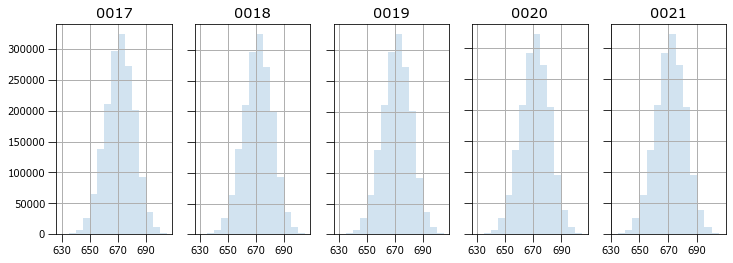

In [27]:
bins = np.arange(630, 710, 5)
fig, axarr = plt.subplots(ncols=5, nrows=1, figsize=(12, 4))
for i in range(len(files)):
    ax = axarr[i]
    ax.hist(image[i].flatten(), alpha=0.2, bins=bins, label=i)
    ax.grid()
    ax.set_xticks([630,650,670,690])
    ax.set_title(files[i][8:12])
    if i > 0:
        ax.label_outer()
plt.xlim(630,710)

The histograms looks similar as expected.
Let display two of the four images.

### Displaying the images

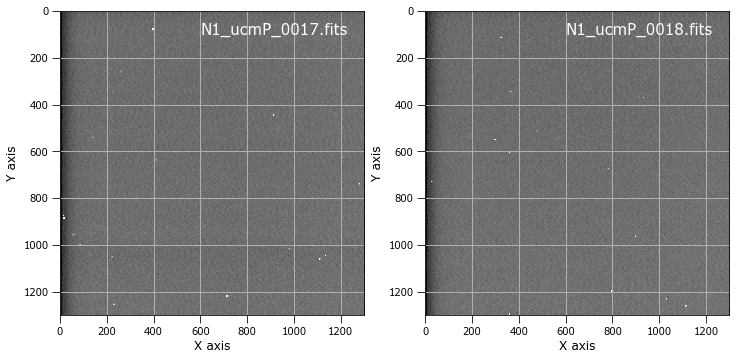

In [28]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
for i in range(0,2):
    ax = axarr[i]
    ax.imshow(image[i], cmap='gray', vmin=650, vmax=700, norm=LogNorm())
    ax.text(600, 100, files[i], fontsize=15, color='w')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.grid()

And now a region in the right lower corner to show some pixels with high values (cosmic rays hits)

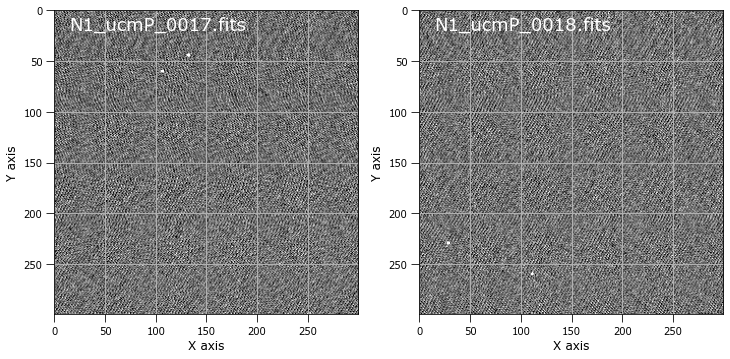

In [29]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
for i in range(0,2):
    ax = axarr[i]
    ax.imshow(image[i][-300:,-300:], cmap='gray', vmin=650, vmax=700, norm=LogNorm())
    ax.text(0.05, 0.95, files[i], ha='left', va='center', color='w', 
            transform=ax.transAxes, fontsize=18)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.grid()

Lets perform some statistics on the images using a fuction similar to that of example 1
In this case we add the standard deviation.

In [30]:
# auxiliary function to display a rectangle and compute mean value within it
def draw_rectangle(ax, image_data, x1, x2, y1, y2, color, text=False):
    ax.plot((x1, x1), (y1, y2), color, lw=1)
    ax.plot((x2, x2), (y1, y2), color, lw=1)
    ax.plot((x1, x2), (y1, y1), color, lw=1)
    ax.plot((x1, x2), (y2, y2), color, lw=1)
    if text:
        media = image_data[y1:y2,x1:x2].mean()
        std   = image_data[y1:y2,x1:x2].std()
        ax.text((x1+x2)/2, y1+(y2-y1)/8, str(int(media)), 
                ha='center', va='top', color=color, fontsize=15)        
        ax.text((x1+x2)/2, y2, str(round(std,1)), 
                ha='center', va='bottom', color=color, fontsize=15)
    return media, std

We are zooming and displaying only a portion of the images: the lower right corner region. 

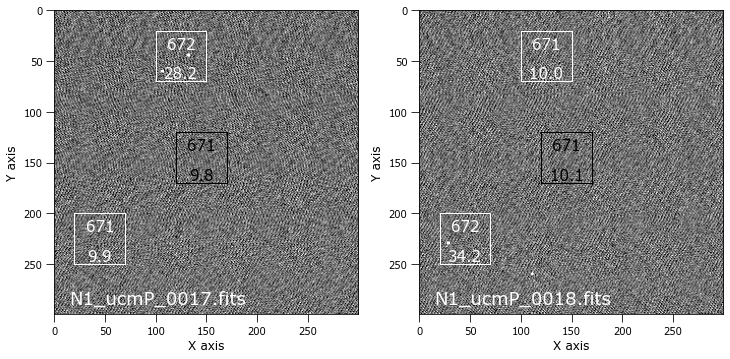

In [31]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
for i in range(0,2):
    ax = axarr[i]
    box = image[i][-300:,-300:]
    ax.imshow(box, cmap='gray', vmin=650, vmax=700,norm=LogNorm())
    ax.text(0.05, 0.05,files[i], ha='left', va='center', color='w',
            transform=ax.transAxes, fontsize=18)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    draw_rectangle(ax, box , 20, 70, 200, 250, color='w',text=True)
    draw_rectangle(ax, box , 100, 150, 20, 70, color='w',text=True)
    draw_rectangle(ax, box , 120, 170, 120, 170, color='k',text=True)

It is interesting to compare the statistics in regions without cosmic rays with values around 671 (standard deviation = 10) and those with one or two hits with higher standard deviation.

### Combining the DARK images

The DARK correction should be made using a combined DARK image (master DARK) using multiple observations. The combination will get rid of the high values produced by the cosmic rays.
We will use the ``ccdproc`` package.

In [32]:
# Some astropy packages 
import ccdproc
from ccdproc import CCDData, Combiner
from astropy import stats
from astropy.stats import sigma_clip, mad_std
from astropy.stats import sigma_clipped_stats

In [33]:
# We need to read again the files with the dark observations to create CCDData objects
# https://docs.astropy.org/en/stable/nddata/ccddata.html
darks = []
for file in files:
    images = CCDData.read(directory+file, unit="adu")
    darks.append(images)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [34]:
# Combiner is a class for combining CCDData objects.
# https://ccdproc.readthedocs.io/en/latest/api/ccdproc.Combiner.html
# The Combiner class is used to combine together CCDData objects 
# including the method for combining the data, rejecting outlying data, 
# and weighting used for combining frames.

combiner = Combiner(darks)

In [35]:
# clipping all values over 800 to remove cosmic rays hits 
combiner.minmax_clipping(min_clip=None, max_clip=800)
# median combine 
master_dark = combiner.median_combine()
# median filter  
master_dark_filtered = ccdproc.median_filter(master_dark, 3)

Let display a region of one of the DARK images and the master DARK

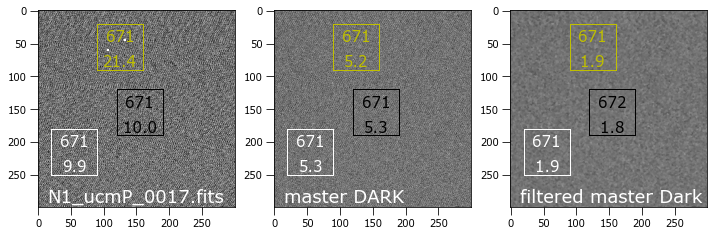

In [36]:
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=(12, 6))
for i in range(3):
    ax = axarr[i]
    if i==0:
        box = image[0][-300:,-300:]
        label = files[0]
    if i==1:  
        box = np.asarray(master_dark[-300:,-300:])   # We need to convert CCDdata to np.array
        label = 'master DARK'
    if i == 2:
        box = np.asarray(master_dark_filtered[-300:,-300:])
        label = 'filtered master Dark'
    ax.imshow(box, cmap='gray', vmin=650, vmax=700,norm=LogNorm())
    ax.text(0.05, 0.05,label, ha='left', va='center', color='w',
            transform=ax.transAxes, fontsize=18)
    draw_rectangle(ax, box , 20, 90, 180, 250, color='w',text=True)
    draw_rectangle(ax, box , 90, 160, 20, 90, color='y',text=True)
    draw_rectangle(ax, box , 120, 190, 120, 190, color='k',text=True)

The cosmic ray hits in the yellow rectangle for the single DARK exposure has disappeared in the master DARK. The standard deviations of the master DARK is also lower that those of the single exposure. The third panel shows a filtered master DARK.   

### Writing the resulting image as FITS file

We can write the resulting CCDdata file to a FITS file. We wish to maintain the information of the header (metadata) and also add some information 

In [37]:
# Extract primary header from single dark file and copy into master_dark header
HDUList_object = fits.open(directory+files[0])
master_dark.header = HDUList_object[0].header

In [38]:
# Replace FILENAME keyword and add information
master_dark.header['FILENAME'] = 'N1_master_dark.fits' 
master_dark.header['HISTORY'] = 'super DARK combining '+ str(len(files)) + 'DARK images'
master_dark.header['HISTORY'] = 'DARK images from ' + str(files[0])+' to ' + str(files[-1])

In [39]:
# Finally writte the image to a FITS file. 
# An error occurs when the file already exits (use overwrite='yes' to avoid the error)
master_dark.write('N1_master_dark.fits',overwrite='yes')